In [2]:
import numpy as np
import matplotlib.pyplot as plt
#导入支持向量机
from sklearn import svm
#导入数据生成工具
from sklearn.datasets import make_blobs

#先创建50个数据点，让他们分为2类
X,y=make_blobs(n_samples=50,centers=2,random_state=6)

#创建一个线性内核的支持向量机模型
clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X,y)
#把数据点画出来
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
#建立图像坐标
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()

#生成2个等差数列
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf.decision_function(xy).reshape(XX.shape)

#把分类的决定边界画出来
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyels=['--','-','--'])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none')
plt.show()

D:\anaconda\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyels'
  s)


<Figure size 640x480 with 1 Axes>

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyels'
  s)


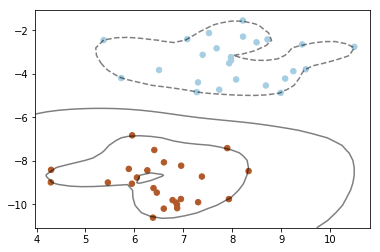

In [3]:
#创建一个RBF内核的支持向量机模型
clf_rbf=svm.SVC(kernel='rbf',C=1000)
clf_rbf.fit(X,y)

#把数据点画出来
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=plt.cm.Paired)
#建立图像坐标
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()

#生成2个等差数列
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
YY,XX=np.meshgrid(yy,xx)
xy=np.vstack([XX.ravel(),YY.ravel()]).T
Z=clf_rbf.decision_function(xy).reshape(XX.shape)

#把分类的决定边界画出来
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyels=['--','-','--'])
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none')
plt.show()

D:\anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


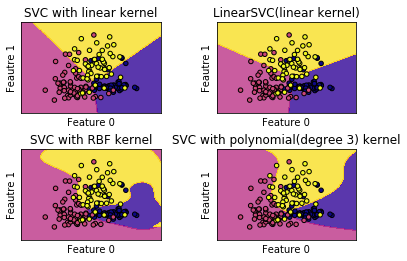

In [4]:
#导入红酒数据集
from sklearn.datasets import load_wine
#定义一个函数用来画图
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                     np.arange(y_min,y_max,h))
    return xx,yy
#定义一个绘制高线的函数
def plot_contours(ax,clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=ax.contourf(xx,yy,Z,**params)
    return out
#使用酒的数据集
wine=load_wine()
#选取前两个特征
X=wine.data[:,:2]
y=wine.target

C=1.0#SVM的正则化参数
models=(svm.SVC(kernel='linear',C=C),
       svm.LinearSVC(C=C),
       svm.SVC(kernel='rbf',gamma=0.7,C=C),
       svm.SVC(kernel='poly',degree=3,C=C))
models=(clf.fit(X,y) for clf in models)

#设定图集
titles=('SVC with linear kernel','LinearSVC(linear kernel)',
       'SVC with RBF kernel',
       'SVC with polynomial(degree 3) kernel')
#设定一个子图形的个数和排列方式
fig,sub=plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
#使用前面定义的函数进行画图
X0,X1=X[:,0],X[:,1]
xx,yy=make_meshgrid(X0,X1)

for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feautre 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#将图形显示出来
plt.show()

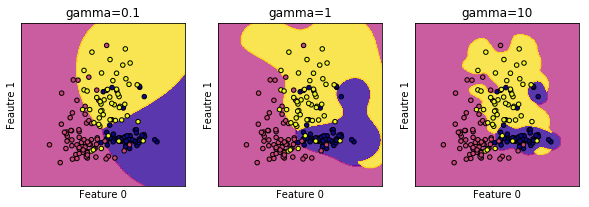

In [5]:
C=1.0#SVM的正则化参数
models=(svm.SVC(kernel='rbf',gamma=0.1,C=C),
       svm.SVC(kernel='rbf',gamma=1,C=C),
       svm.SVC(kernel='rbf',gamma=10,C=C))
models=(clf.fit(X,y) for clf in models)

#设定图集
titles=('gamma=0.1',
       'gamma=1',
       'gamma=10')
#设置子图形个数和排列
fig,sub=plt.subplots(1,3,figsize=(10,3))

#使用前面定义的函数进行画图
X0,X1=X[:,0],X[:,1]
xx,yy=make_meshgrid(X0,X1)

for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feautre 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#将图形显示出来
plt.show()

SVM示例-波士顿房价回归分析

In [6]:
#导入波士顿房价数据集
from sklearn.datasets import load_boston
boston=load_boston()
#打印数据集中的键
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
#导入数据拆分工具
from sklearn.model_selection import train_test_split
#建立训练数据集和测试数据集
X,y=boston.data,boston.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
#打印训练集和测试集的形态
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [9]:
#导入支持向量机回归模型
from sklearn.svm import SVR
#分别测试linear核函数和rbf核函数
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel)
    svr.fit(X_train,y_train)
    print(kernel,'核函数的模型训练集得分：{:.3f}'.format(svr.score(X_train,y_train)))
    print(kernel,'核函数的模型测试集得分：{:.3f}'.format(svr.score(X_test,y_test)))

linear 核函数的模型训练集得分：0.709
linear 核函数的模型测试集得分：0.696
rbf 核函数的模型训练集得分：0.145
rbf 核函数的模型测试集得分：0.001


D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


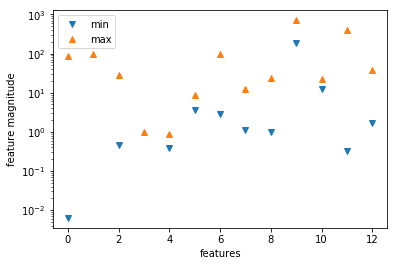

In [10]:
#将特征值中的最小值和最大值用散点图画出来
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
#设定纵坐标为对数形式
plt.yscale('log')
#设置图注位置为最佳
plt.legend(loc='best')
#设定横轴纵轴标题
plt.xlabel('features')
plt.ylabel('feature magnitude')
#显示图形
plt.show()

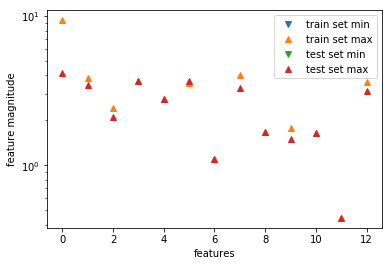

In [11]:
#导入数据预处理工具
from sklearn.preprocessing import StandardScaler
#对训练集和测试集数据进行预处理
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#将预处理后的数据特征最大值和最小值用散点图表示出来
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
plt.yscale('log')

#设置图标位置
plt.legend(loc='best')
#设定横轴纵轴标题
plt.xlabel('features')
plt.ylabel('feature magnitude')
#显示图形
plt.show()

In [13]:
#用预处理后的数据重新训练模型
for kernel in ['linear','rbf']:
    svr=SVR(kernel=kernel)
    svr.fit(X_train_scaled,y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分：{:.3f}'.format(svr.score(X_train_scaled,y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分：{:.3f}'.format(svr.score(X_test_scaled,y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.706
数据预处理后 linear 核函数的模型测试集得分：0.698
数据预处理后 rbf 核函数的模型训练集得分：0.665
数据预处理后 rbf 核函数的模型测试集得分：0.695


In [16]:
#设置模型C参数和gamma参数
svr=SVR(C=100,gamma=0.1)
svr.fit(X_train_scaled,y_train)
print('调节参数后的模型在训练集得分：{:.3f}'.format(svr.score(X_train_scaled,y_train)))
print('调节参数后的模型在测试集得分：{:.3f}'.format(svr.score(X_test_scaled,y_test)))

调节参数后的模型在训练集得分：0.966
调节参数后的模型在测试集得分：0.894
